In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
IGS_data = pd.read_excel('/Users/cerser5/Downloads/Inclusive_Growth_Score_Data.xlsx', sheet_name = 'Compared to Urban-Rural', header = 1)
IGS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   N/A                                  749 non-null    float64
 1   Census Tract FIPS code               749 non-null    float64
 2   County                               749 non-null    object 
 3   State                                749 non-null    object 
 4   Year                                 749 non-null    float64
 5   Inclusive Growth Score               742 non-null    float64
 6   Residential Real Estate Value Score  674 non-null    float64
 7   Affordable Housing Score             733 non-null    float64
 8   Personal Income Score                742 non-null    float64
dtypes: float64(7), object(2)
memory usage: 52.9+ KB


In [42]:
IGS_data.head(10)

,Census Tract FIPS code,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
1,5.174021e+10,Portsmouth city,Virginia,2017,40.0,56.0,12.0,74.0
2,5.174021e+10,Portsmouth city,Virginia,2018,38.0,54.0,12.0,71.0
3,5.174021e+10,Portsmouth city,Virginia,2019,51.0,46.0,8.0,58.0
4,5.174021e+10,Portsmouth city,Virginia,2020,44.0,60.0,4.0,44.0
5,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0
6,5.174021e+10,Portsmouth city,Virginia,2022,41.0,32.0,2.0,38.0
7,5.174021e+10,Portsmouth city,Virginia,2023,40.0,34.0,2.0,40.0
8,5.171000e+10,Norfolk city,Virginia,2017,40.0,12.0,40.0,64.0
9,5.171000e+10,Norfolk city,Virginia,2018,40.0,11.0,48.0,54.0
10,5.171000e+10,Norfolk city,Virginia,2019,44.0,18.0,48.0,48.0


In [4]:
IGS_data = IGS_data.drop(0) # dropped first row
IGS_data = IGS_data.drop('N/A', axis = 1) # removed first column
IGS_data.head(10)

,Census Tract FIPS code,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
1,5.174021e+10,Portsmouth city,Virginia,2017.0,40.0,56.0,12.0,74.0
2,5.174021e+10,Portsmouth city,Virginia,2018.0,38.0,54.0,12.0,71.0
3,5.174021e+10,Portsmouth city,Virginia,2019.0,51.0,46.0,8.0,58.0
4,5.174021e+10,Portsmouth city,Virginia,2020.0,44.0,60.0,4.0,44.0
5,5.174021e+10,Portsmouth city,Virginia,2021.0,46.0,50.0,5.0,37.0
6,5.174021e+10,Portsmouth city,Virginia,2022.0,41.0,32.0,2.0,38.0
7,5.174021e+10,Portsmouth city,Virginia,2023.0,40.0,34.0,2.0,40.0
8,5.171000e+10,Norfolk city,Virginia,2017.0,40.0,12.0,40.0,64.0
9,5.171000e+10,Norfolk city,Virginia,2018.0,40.0,11.0,48.0,54.0
10,5.171000e+10,Norfolk city,Virginia,2019.0,44.0,18.0,48.0,48.0


In [7]:
duplicate_rows = IGS_data[IGS_data.duplicated(subset=['Year', 'County'], keep=False)]
duplicate_rows

,Census Tract FIPS code,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
1,5.174021e+10,Portsmouth city,Virginia,2017.0,40.0,56.0,12.0,74.0
2,5.174021e+10,Portsmouth city,Virginia,2018.0,38.0,54.0,12.0,71.0
3,5.174021e+10,Portsmouth city,Virginia,2019.0,51.0,46.0,8.0,58.0
4,5.174021e+10,Portsmouth city,Virginia,2020.0,44.0,60.0,4.0,44.0
5,5.174021e+10,Portsmouth city,Virginia,2021.0,46.0,50.0,5.0,37.0
...,...,...,...,...,...,...,...,...
745,5.171001e+10,Norfolk city,Virginia,2019.0,31.0,55.0,37.0,65.0
746,5.171001e+10,Norfolk city,Virginia,2020.0,38.0,55.0,38.0,73.0
747,5.171001e+10,Norfolk city,Virginia,2021.0,34.0,NaN,41.0,74.0
748,5.171001e+10,Norfolk city,Virginia,2022.0,38.0,NaN,13.0,63.0


In [10]:
IGS_graph_data = IGS_data.drop('Census Tract FIPS code', axis = 1)
IGS_graph_data

,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
1,Portsmouth city,Virginia,2017.0,40.0,56.0,12.0,74.0
2,Portsmouth city,Virginia,2018.0,38.0,54.0,12.0,71.0
3,Portsmouth city,Virginia,2019.0,51.0,46.0,8.0,58.0
4,Portsmouth city,Virginia,2020.0,44.0,60.0,4.0,44.0
5,Portsmouth city,Virginia,2021.0,46.0,50.0,5.0,37.0
...,...,...,...,...,...,...,...
745,Norfolk city,Virginia,2019.0,31.0,55.0,37.0,65.0
746,Norfolk city,Virginia,2020.0,38.0,55.0,38.0,73.0
747,Norfolk city,Virginia,2021.0,34.0,NaN,41.0,74.0
748,Norfolk city,Virginia,2022.0,38.0,NaN,13.0,63.0


In [11]:
duplicate_rows = IGS_graph_data[IGS_graph_data.duplicated(subset=['Year', 'County'], keep=False)]
duplicate_rows

,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
1,Portsmouth city,Virginia,2017.0,40.0,56.0,12.0,74.0
2,Portsmouth city,Virginia,2018.0,38.0,54.0,12.0,71.0
3,Portsmouth city,Virginia,2019.0,51.0,46.0,8.0,58.0
4,Portsmouth city,Virginia,2020.0,44.0,60.0,4.0,44.0
5,Portsmouth city,Virginia,2021.0,46.0,50.0,5.0,37.0
...,...,...,...,...,...,...,...
745,Norfolk city,Virginia,2019.0,31.0,55.0,37.0,65.0
746,Norfolk city,Virginia,2020.0,38.0,55.0,38.0,73.0
747,Norfolk city,Virginia,2021.0,34.0,NaN,41.0,74.0
748,Norfolk city,Virginia,2022.0,38.0,NaN,13.0,63.0


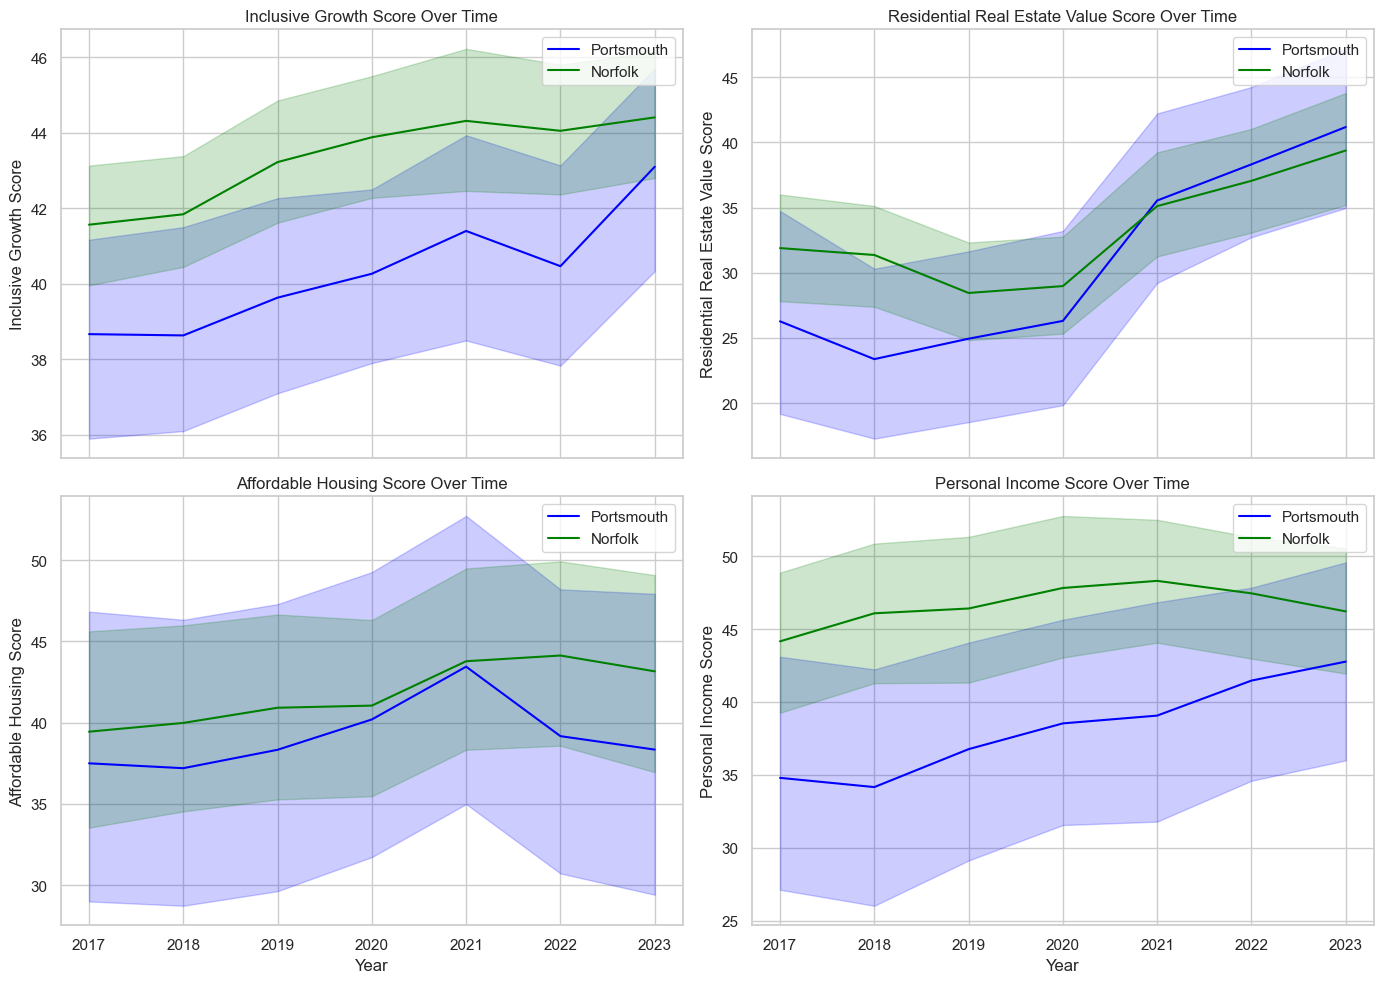

In [16]:
Portsmouth = IGS_graph_data[IGS_graph_data['County'] == 'Portsmouth city']
Norfolk = IGS_graph_data[IGS_graph_data['County'] == 'Norfolk city']

sns.set(style="whitegrid")

# Create subplots to compare the cities across different metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Plot for Inclusive Growth Score
sns.lineplot(ax=axes[0, 0], x='Year', y='Inclusive Growth Score', data=Portsmouth, label='Portsmouth', color='blue')
sns.lineplot(ax=axes[0, 0], x='Year', y='Inclusive Growth Score', data=Norfolk, label='Norfolk', color='green')
axes[0, 0].set_title('Inclusive Growth Score Over Time')

# Plot for Residential Real Estate Value Score
sns.lineplot(ax=axes[0, 1], x='Year', y='Residential Real Estate Value Score', data=Portsmouth, label='Portsmouth', color='blue')
sns.lineplot(ax=axes[0, 1], x='Year', y='Residential Real Estate Value Score', data=Norfolk, label='Norfolk', color='green')
axes[0, 1].set_title('Residential Real Estate Value Score Over Time')

# Plot for Affordable Housing Score
sns.lineplot(ax=axes[1, 0], x='Year', y='Affordable Housing Score', data=Portsmouth, label='Portsmouth', color='blue')
sns.lineplot(ax=axes[1, 0], x='Year', y='Affordable Housing Score', data=Norfolk, label='Norfolk', color='green')
axes[1, 0].set_title('Affordable Housing Score Over Time')

# Plot for Personal Income Score
sns.lineplot(ax=axes[1, 1], x='Year', y='Personal Income Score', data=Portsmouth, label='Portsmouth', color='blue')
sns.lineplot(ax=axes[1, 1], x='Year', y='Personal Income Score', data=Norfolk, label='Norfolk', color='green')
axes[1, 1].set_title('Personal Income Score Over Time')

# Set the x-axis labels
for ax in axes.flat:
    ax.set(xlabel='Year')

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
Mental_Health_Data = pd.read_csv('/Users/cerser5/Downloads/PLACES__Local_Data_for_Better_Health__County_Data.csv')

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_846/3904749080.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Mental_Health_Data = pd.read_csv('/Users/cerser5/Downloads/PLACES__Local_Data_for_Better_Health__County_Data.csv')


In [26]:
Mental_Health_Data.head(5)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2022,US,United States,NaN,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Crude prevalence,12.0,...,11.8,12.2,333287557,260836730,59,HLTHOUT,DIABETES,CrdPrv,Diabetes,NaN
1,2022,AL,Alabama,Barbour,BRFSS,Disability,Hearing disability among adults,%,Crude prevalence,9.6,...,8.5,10.7,24706,19675,1005,DISABLT,HEARING,CrdPrv,Hearing Disability,POINT (-85.3928136383141 31.8698172860413)
2,2022,AL,Alabama,Calhoun,BRFSS,Health Outcomes,Stroke among adults,%,Age-adjusted prevalence,3.7,...,3.4,4.0,115788,91336,1015,HLTHOUT,STROKE,AgeAdjPrv,Stroke,POINT (-85.8257674379293 33.7714931264898)
3,2022,AL,Alabama,Chambers,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,5.6,...,5.1,6.0,34088,27025,1017,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-85.3917577489906 32.9141677822456)
4,2022,AL,Alabama,Clay,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,5.3,...,4.9,5.7,14198,11235,1027,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-85.8606604130173 33.2693085517833)


In [27]:
# Filtering Norfolk and Portsmouth Data
Va_data = Mental_Health_Data.loc[(Mental_Health_Data['StateAbbr'] == 'VA') & (Mental_Health_Data['LocationName'].isin(['Norfolk', 'Portsmouth']))]
Va_data.head(5)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
215698,2022,VA,Virginia,Norfolk,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Age-adjusted prevalence,13.9,...,12.4,15.5,232995,186236,51710,HLTHOUT,DIABETES,AgeAdjPrv,Diabetes,POINT (-76.2594956953889 36.8946370439568)
215835,2022,VA,Virginia,Portsmouth,BRFSS,Health Outcomes,Current asthma among adults,%,Crude prevalence,11.3,...,10.0,12.8,97029,74842,51740,HLTHOUT,CASTHMA,CrdPrv,Current Asthma,POINT (-76.3542600357069 36.846673287269)
216065,2022,VA,Virginia,Norfolk,BRFSS,Disability,Vision disability among adults,%,Age-adjusted prevalence,6.0,...,5.5,6.5,232995,186236,51710,DISABLT,VISION,AgeAdjPrv,Vision Disability,POINT (-76.2594956953889 36.8946370439568)
216137,2022,VA,Virginia,Norfolk,BRFSS,Prevention,Current lack of health insurance among adults ...,%,Age-adjusted prevalence,8.9,...,7.9,10.1,232995,186236,51710,PREVENT,ACCESS2,AgeAdjPrv,Health Insurance,POINT (-76.2594956953889 36.8946370439568)
216311,2022,VA,Virginia,Norfolk,BRFSS,Health Outcomes,Cancer (non-skin) or melanoma among adults,%,Age-adjusted prevalence,6.4,...,5.8,7.0,232995,186236,51710,HLTHOUT,CANCER,AgeAdjPrv,Cancer (non-skin) or Melanoma,POINT (-76.2594956953889 36.8946370439568)


In [8]:
Va_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 215698 to 233461
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        132 non-null    int64  
 1   StateAbbr                   132 non-null    object 
 2   StateDesc                   132 non-null    object 
 3   LocationName                132 non-null    object 
 4   DataSource                  132 non-null    object 
 5   Category                    132 non-null    object 
 6   Measure                     132 non-null    object 
 7   Data_Value_Unit             132 non-null    object 
 8   Data_Value_Type             132 non-null    object 
 9   Data_Value                  132 non-null    float64
 10  Data_Value_Footnote_Symbol  0 non-null      object 
 11  Data_Value_Footnote         0 non-null      object 
 12  Low_Confidence_Limit        132 non-null    float64
 13  High_Confidence_Limit      

In [9]:
healthissues = Mental_Health_Data['Measure'].unique()
print(healthissues)

['Diagnosed diabetes among adults' 'Hearing disability among adults'
 'Stroke among adults' 'Short sleep duration among adults'
 'Cancer (non-skin) or melanoma among adults'
 'Frequent physical distress among adults'
 'Current lack of health insurance among adults aged 18-64 years'
 'Current asthma among adults' 'Arthritis among adults'
 'Cognitive disability among adults' 'Mobility disability among adults'
 'Any disability among adults' 'Depression among adults'
 'Obesity among adults' 'Binge drinking among adults'
 'Visits to doctor for routine checkup within the past year among adults'
 'Coronary heart disease among adults'
 'Feeling socially isolated among adults'
 'Chronic obstructive pulmonary disease among adults'
 'High blood pressure among adults' 'Self-care disability among adults'
 'Mammography use among women aged 50-74 years'
 'Vision disability among adults' 'Cholesterol screening among adults'
 'All teeth lost among adults aged >=65 years'
 'Independent living disability

In [10]:
print(IGS_data.describe())


       Census Tract FIPS code         Year  Inclusive Growth Score  \
count            7.490000e+02   749.000000              742.000000   
mean             5.171848e+10  2020.000000               42.473046   
std              1.357264e+07     2.001336                7.619579   
min              5.171000e+10  2017.000000               22.000000   
25%              5.171000e+10  2018.000000               37.000000   
50%              5.171001e+10  2020.000000               42.000000   
75%              5.174021e+10  2022.000000               48.000000   
max              5.174021e+10  2023.000000               64.000000   

       Residential Real Estate Value Score  Affordable Housing Score  \
count                           674.000000                733.000000   
mean                             32.275964                 41.025921   
std                              17.848407                 25.476028   
min                               1.000000                  0.000000   
25%      

In [11]:
print(Va_data.describe())

              Year  Data_Value  Low_Confidence_Limit  High_Confidence_Limit  \
count   132.000000  132.000000            132.000000             132.000000   
mean   2021.878788   27.921970             25.546212              30.295455   
std       0.327617   24.143861             22.977262              25.176737   
min    2021.000000    3.600000              3.300000               3.900000   
25%    2022.000000    9.425000              8.500000              10.475000   
50%    2022.000000   17.950000             16.200000              20.300000   
75%    2022.000000   38.900000             34.250000              43.525000   
max    2022.000000   85.500000             83.000000              87.700000   

       TotalPopulation  TotalPop18plus    LocationID  
count       132.000000      132.000000    132.000000  
mean     165012.000000   130539.000000  51725.000000  
std       68241.983795    55909.179816     15.057143  
min       97029.000000    74842.000000  51710.000000  
25%       970

In [23]:
IGS_data['Year'] = IGS_data['Year'].astype(int)
IGS_2122 = IGS_data.loc[IGS_data['Year'].isin([2021, 2022])]
IGS_2122

,Census Tract FIPS code,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
5,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0
6,5.174021e+10,Portsmouth city,Virginia,2022,41.0,32.0,2.0,38.0
12,5.171000e+10,Norfolk city,Virginia,2021,41.0,25.0,39.0,65.0
13,5.171000e+10,Norfolk city,Virginia,2022,46.0,50.0,52.0,73.0
19,5.174021e+10,Portsmouth city,Virginia,2021,46.0,44.0,54.0,41.0
...,...,...,...,...,...,...,...,...
734,5.171000e+10,Norfolk city,Virginia,2022,48.0,63.0,7.0,42.0
740,5.171000e+10,Norfolk city,Virginia,2021,22.0,11.0,27.0,31.0
741,5.171000e+10,Norfolk city,Virginia,2022,32.0,26.0,39.0,54.0
747,5.171001e+10,Norfolk city,Virginia,2021,34.0,NaN,41.0,74.0


In [31]:
merged_data = pd.merge(
    IGS_2122,
    Va_data,
    left_on=['State'],  
    right_on=['StateDesc'],  
    how='inner'
)

merged_data

,Census Tract FIPS code,County,State,Year_x,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score,Year_y,StateAbbr,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0,2022,VA,...,12.4,15.5,232995,186236,51710,HLTHOUT,DIABETES,AgeAdjPrv,Diabetes,POINT (-76.2594956953889 36.8946370439568)
1,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0,2022,VA,...,10.0,12.8,97029,74842,51740,HLTHOUT,CASTHMA,CrdPrv,Current Asthma,POINT (-76.3542600357069 36.846673287269)
2,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0,2022,VA,...,5.5,6.5,232995,186236,51710,DISABLT,VISION,AgeAdjPrv,Vision Disability,POINT (-76.2594956953889 36.8946370439568)
3,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0,2022,VA,...,7.9,10.1,232995,186236,51710,PREVENT,ACCESS2,AgeAdjPrv,Health Insurance,POINT (-76.2594956953889 36.8946370439568)
4,5.174021e+10,Portsmouth city,Virginia,2021,46.0,50.0,5.0,37.0,2022,VA,...,5.8,7.0,232995,186236,51710,HLTHOUT,CANCER,AgeAdjPrv,Cancer (non-skin) or Melanoma,POINT (-76.2594956953889 36.8946370439568)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28243,5.171001e+10,Norfolk city,Virginia,2022,38.0,NaN,13.0,63.0,2022,VA,...,13.0,18.3,232995,186236,51710,HLTHOUT,TEETHLOST,AgeAdjPrv,All Teeth Lost,POINT (-76.2594956953889 36.8946370439568)
28244,5.171001e+10,Norfolk city,Virginia,2022,38.0,NaN,13.0,63.0,2022,VA,...,4.0,4.7,232995,186236,51710,DISABLT,SELFCARE,AgeAdjPrv,Self-care Disability,POINT (-76.2594956953889 36.8946370439568)
28245,5.171001e+10,Norfolk city,Virginia,2022,38.0,NaN,13.0,63.0,2022,VA,...,77.5,87.1,232995,186236,51710,PREVENT,MAMMOUSE,CrdPrv,Mammography,POINT (-76.2594956953889 36.8946370439568)
28246,5.171001e+10,Norfolk city,Virginia,2022,38.0,NaN,13.0,63.0,2022,VA,...,5.0,6.1,232995,186236,51710,HLTHOUT,CHD,CrdPrv,Coronary Heart Disease,POINT (-76.2594956953889 36.8946370439568)


In [32]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Census Tract FIPS code               28248 non-null  float64
 1   County                               28248 non-null  object 
 2   State                                28248 non-null  object 
 3   Year_x                               28248 non-null  int64  
 4   Inclusive Growth Score               27984 non-null  float64
 5   Residential Real Estate Value Score  24684 non-null  float64
 6   Affordable Housing Score             27192 non-null  float64
 7   Personal Income Score                27984 non-null  float64
 8   Year_y                               28248 non-null  int64  
 9   StateAbbr                            28248 non-null  object 
 10  StateDesc                            28248 non-null  object 
 11  LocationName                

In [33]:
correlation = merged_data['Inclusive Growth Score'].corr(merged_data['Data_Value'])
print(f"Correlation between Inclusive Growth Score and Mental Health Data Value: {correlation}")

Correlation between Inclusive Growth Score and Mental Health Data Value: 2.42505618696291e-18


In [36]:
# Group by LocationName and Measure, then aggregate by mean
aggregated_data = Va_data.groupby(['LocationName', 'Measure']).agg({'Data_Value': 'mean'}).reset_index()

# Pivot the data after aggregation
pivoted_data = aggregated_data.pivot(index='LocationName', columns='Measure', values='Data_Value')

# Filter for Norfolk and Portsmouth
filtered_data = pivoted_data.loc[['Norfolk', 'Portsmouth']]

# Display the filtered data
filtered_data

Measure,All teeth lost among adults aged >=65 years,Any disability among adults,Arthritis among adults,Binge drinking among adults,Cancer (non-skin) or melanoma among adults,Cholesterol screening among adults,Chronic obstructive pulmonary disease among adults,Cognitive disability among adults,Colorectal cancer screening among adults aged 45–75 years,Coronary heart disease among adults,...,Mobility disability among adults,No leisure-time physical activity among adults,Obesity among adults,Self-care disability among adults,Short sleep duration among adults,Stroke among adults,Taking medicine to control high blood pressure among adults with high blood pressure,Vision disability among adults,Visited dentist or dental clinic in the past year among adults,Visits to doctor for routine checkup within the past year among adults
LocationName,,,,,,,,,,,,,,,,,,,,,
Norfolk,15.30,33.60,26.65,20.50,6.15,84.25,6.95,15.95,64.6,5.75,...,14.85,23.05,39.3,4.20,41.40,3.75,70.45,5.90,62.05,79.2
Portsmouth,16.35,36.15,27.65,15.25,6.35,85.50,7.65,16.60,63.8,6.45,...,16.80,26.70,45.1,4.95,43.15,4.30,72.40,6.85,58.80,79.5


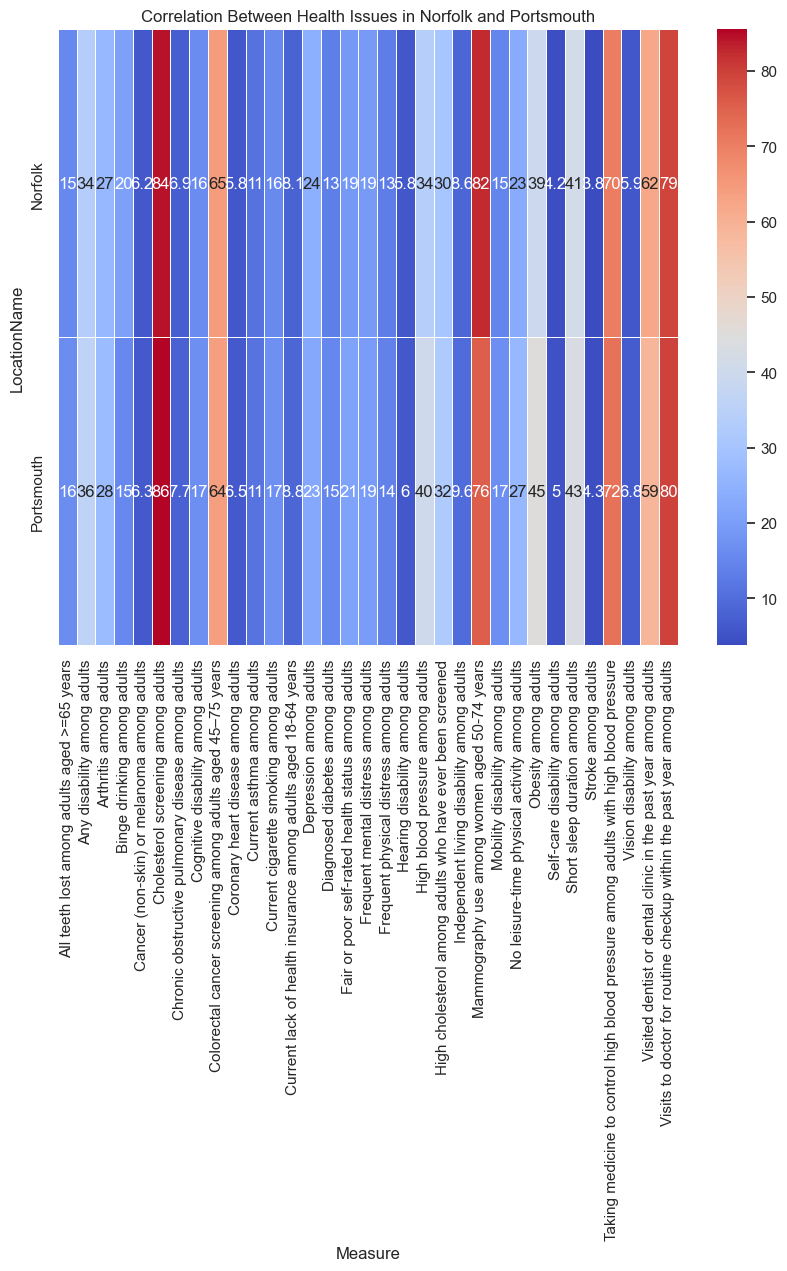

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Health Issues in Norfolk and Portsmouth')
plt.show()

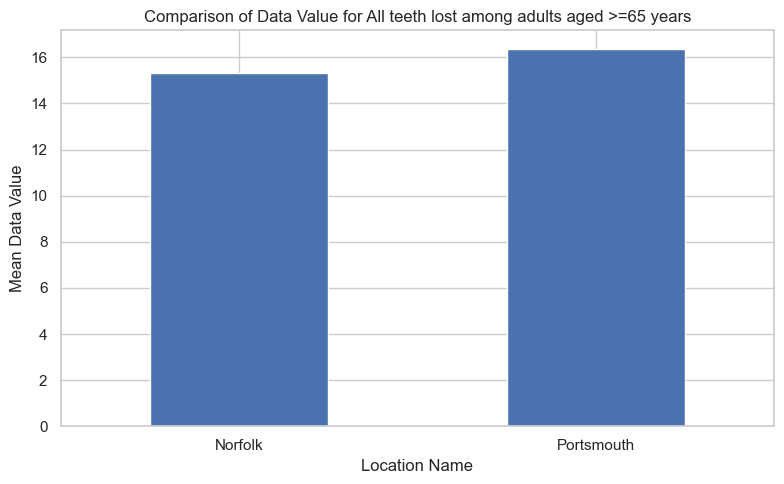

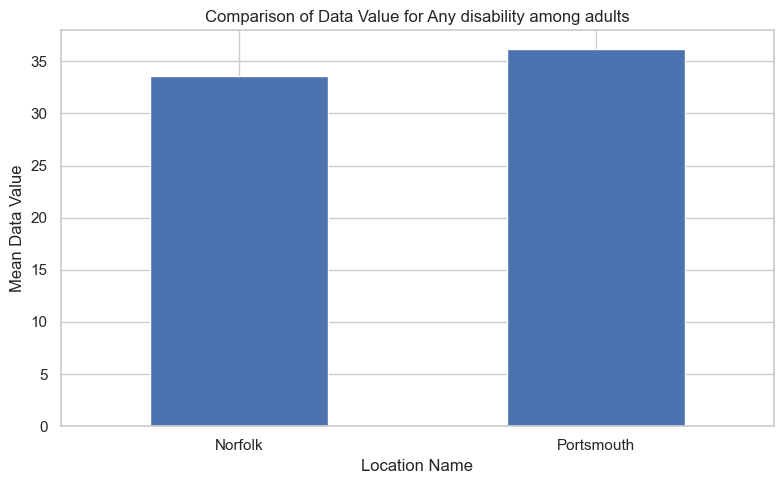

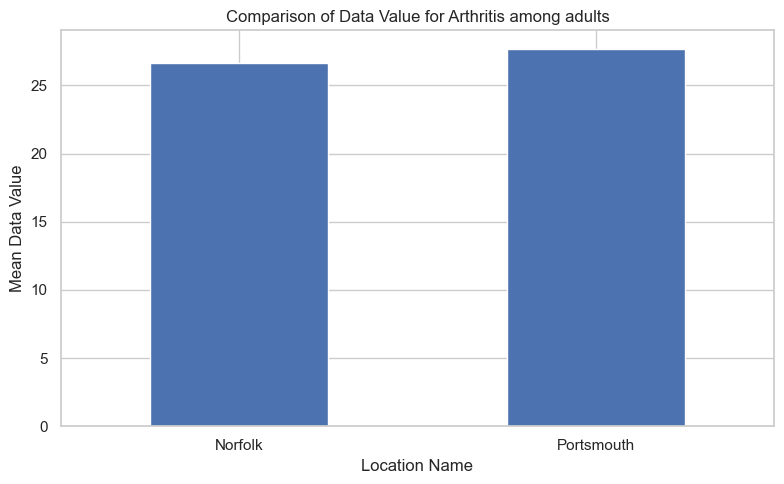

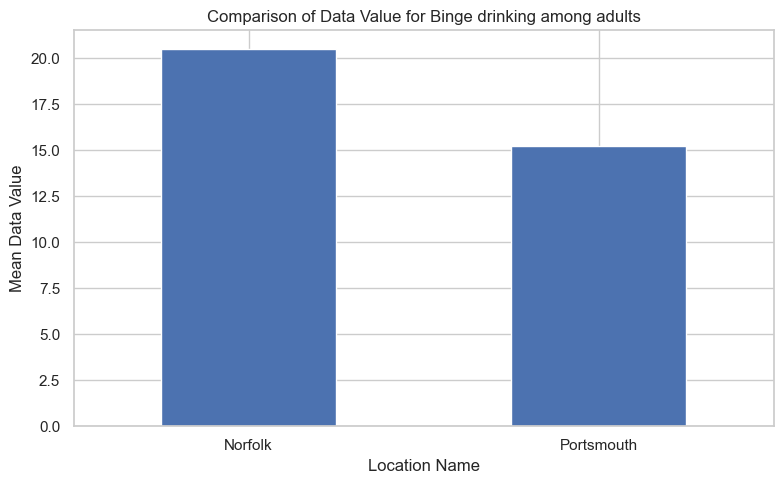

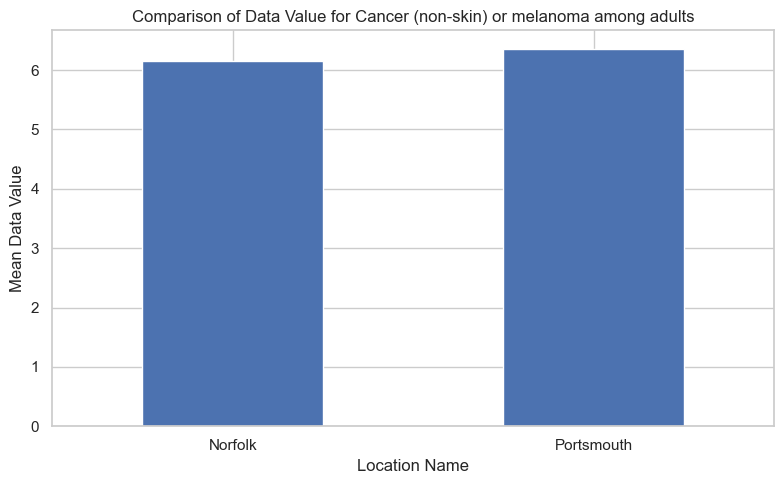

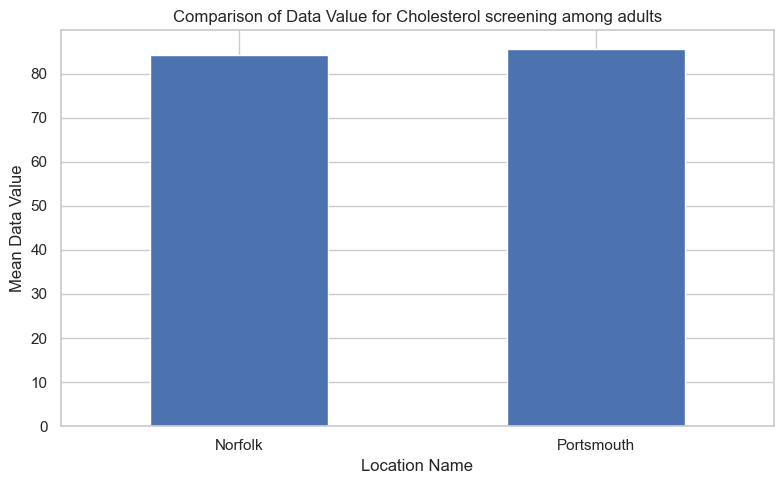

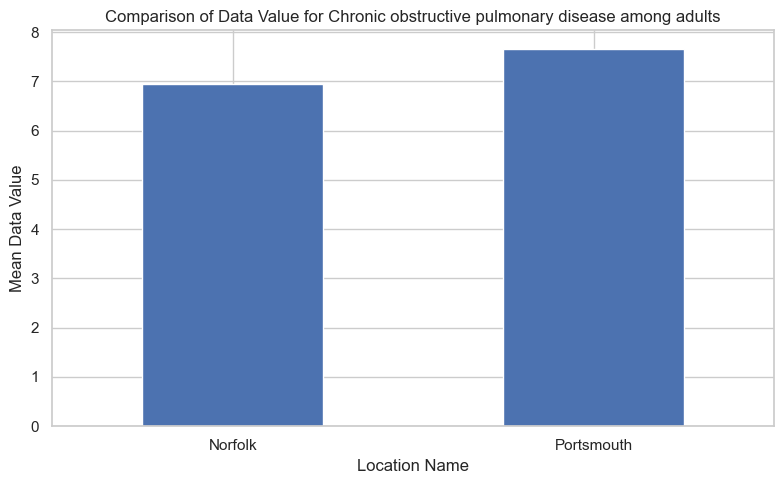

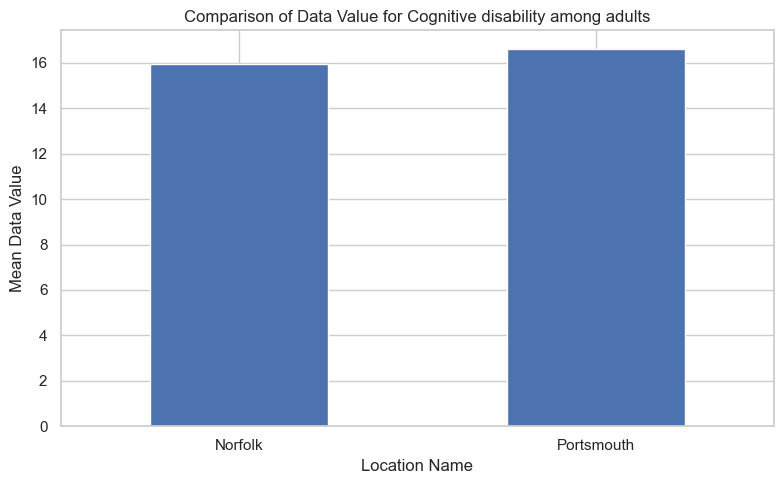

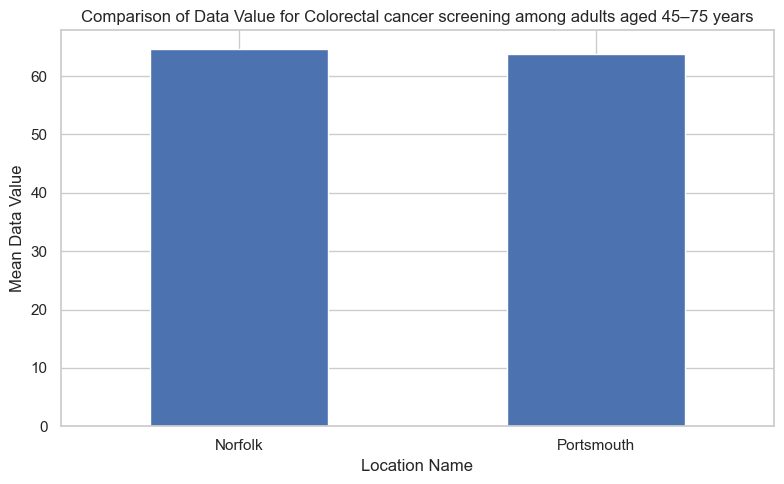

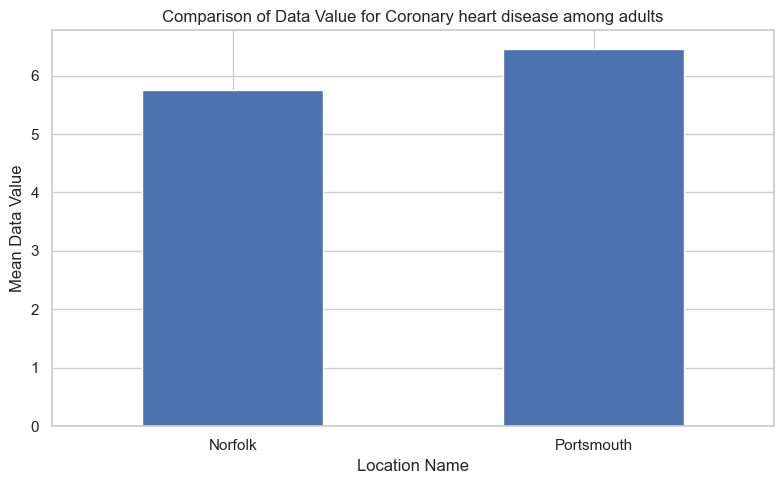

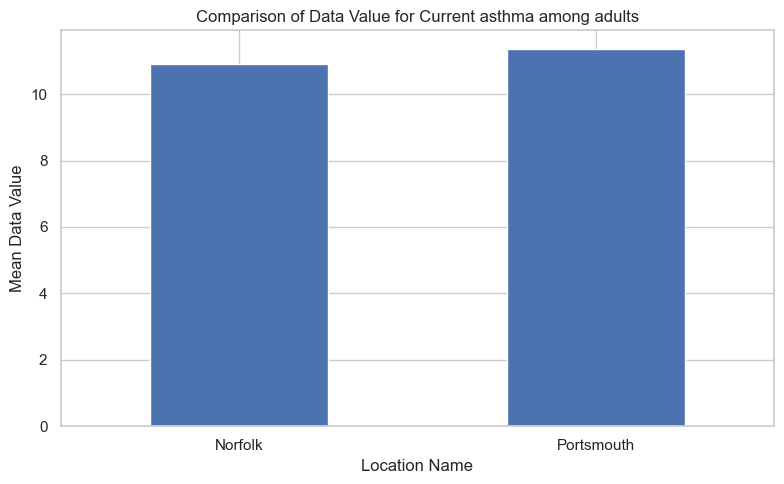

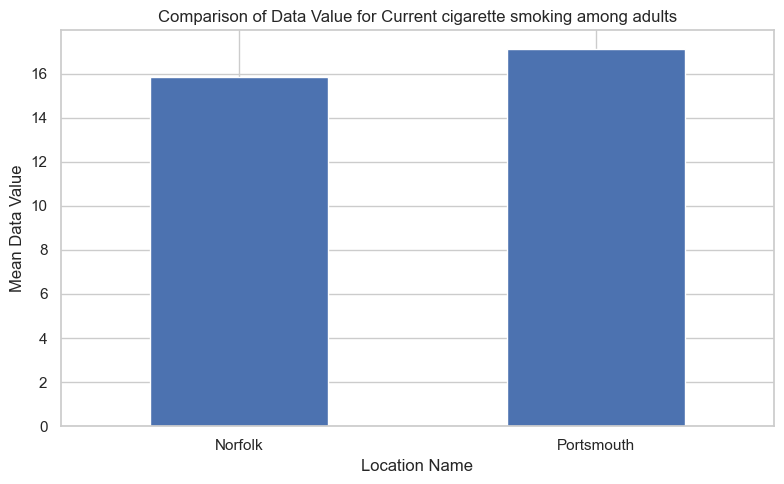

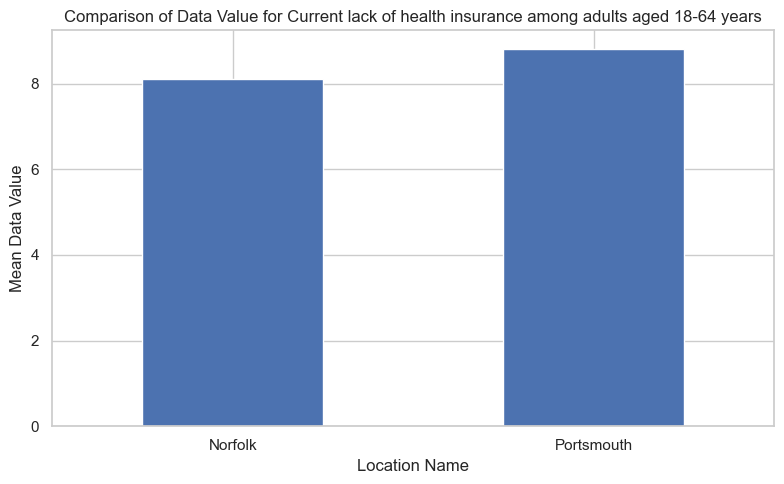

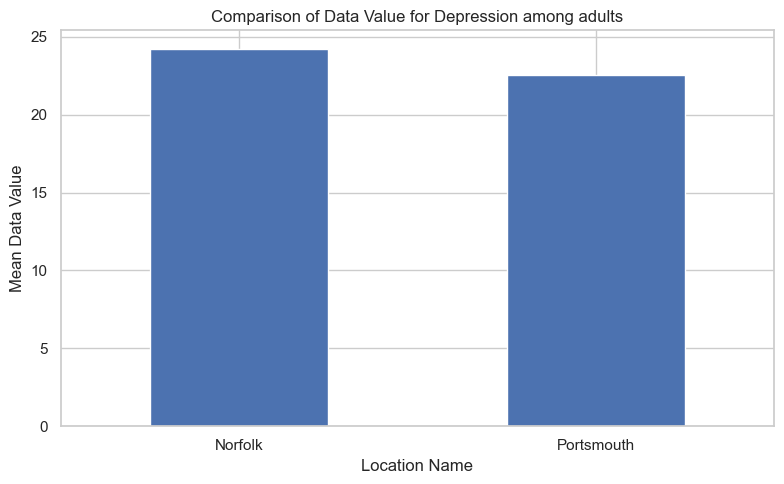

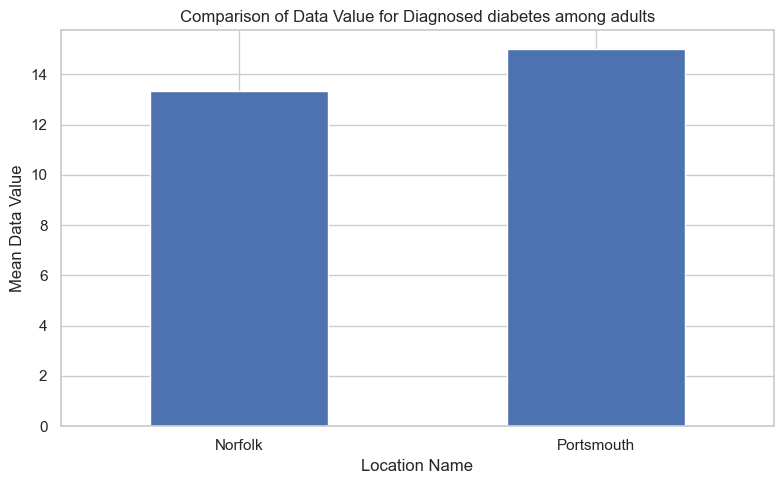

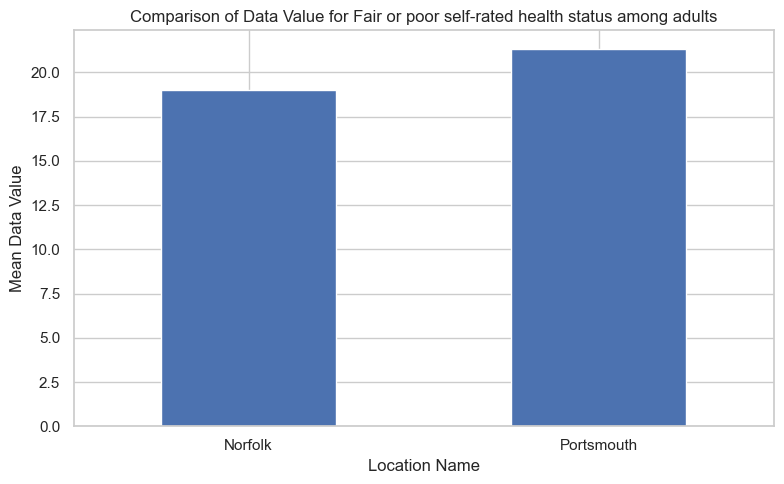

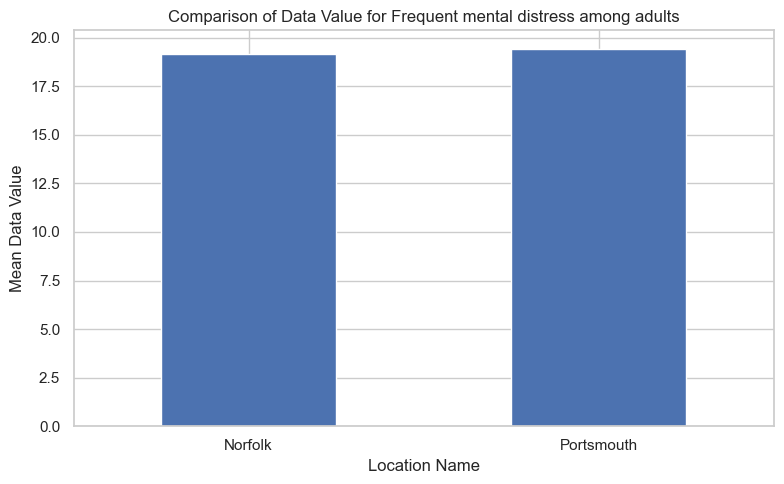

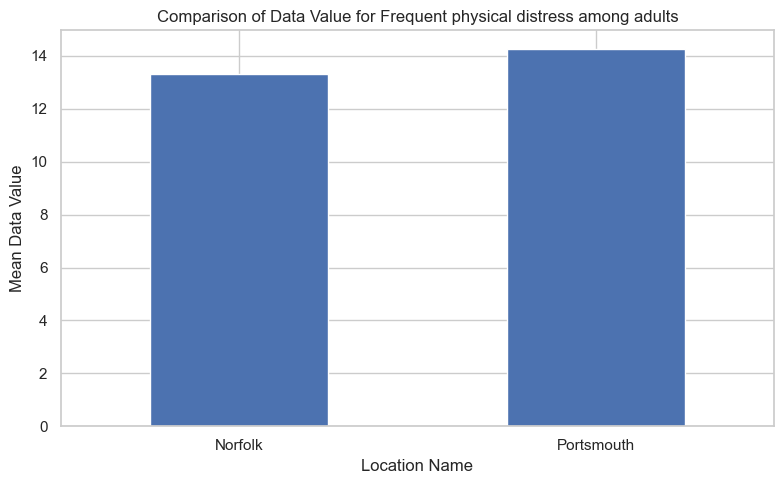

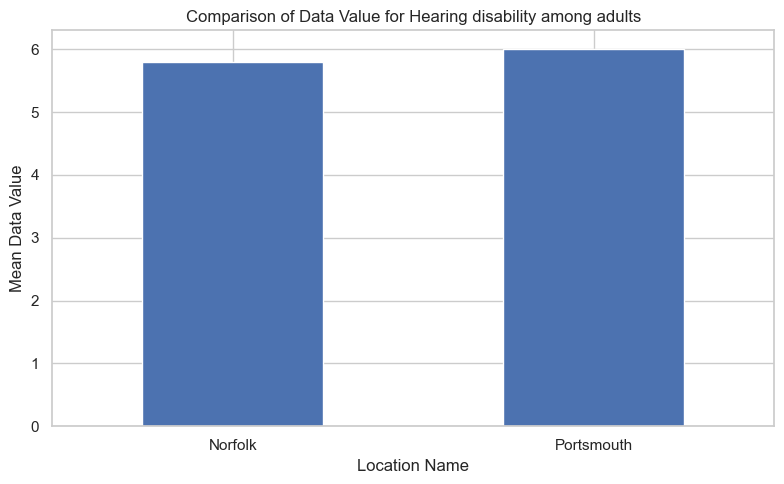

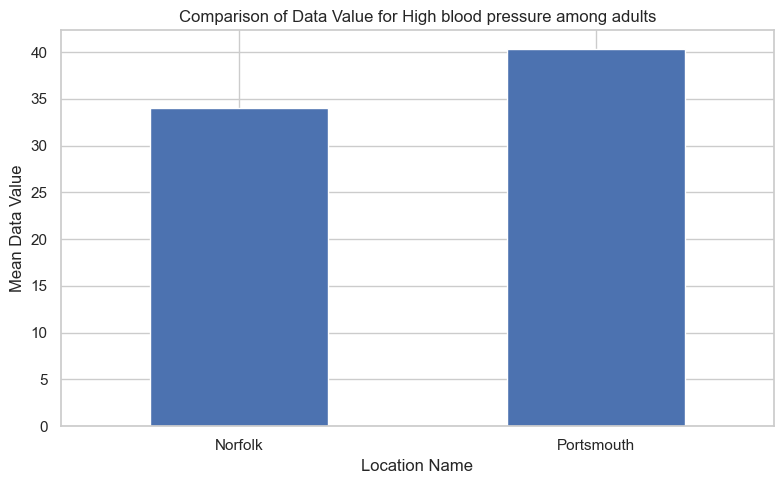

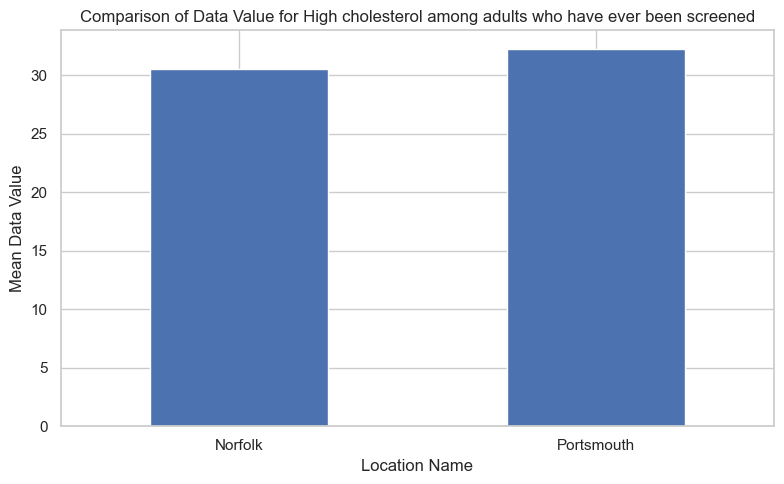

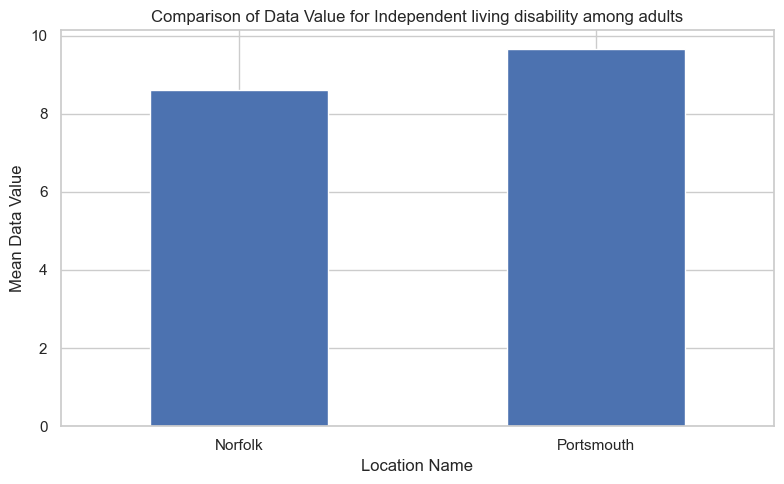

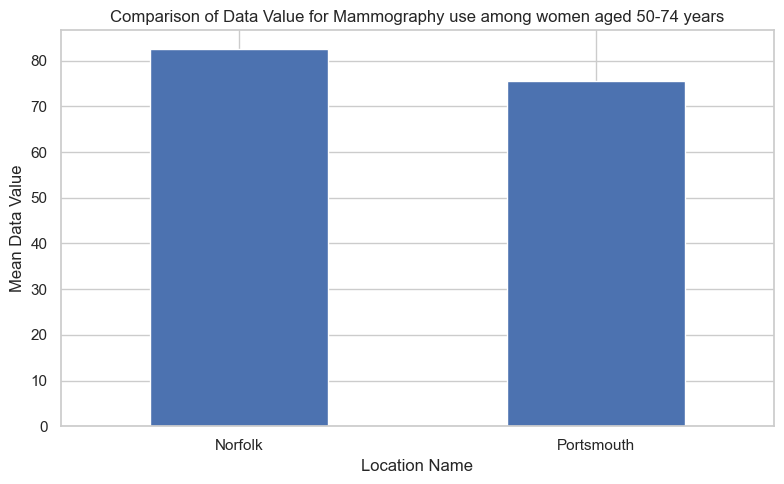

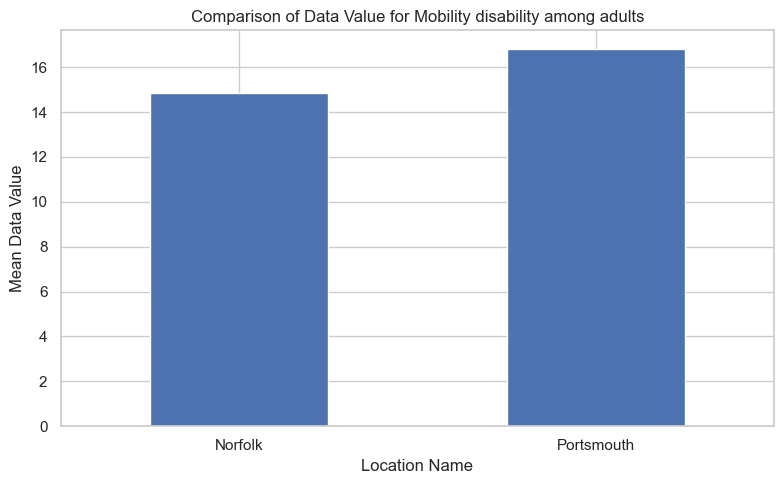

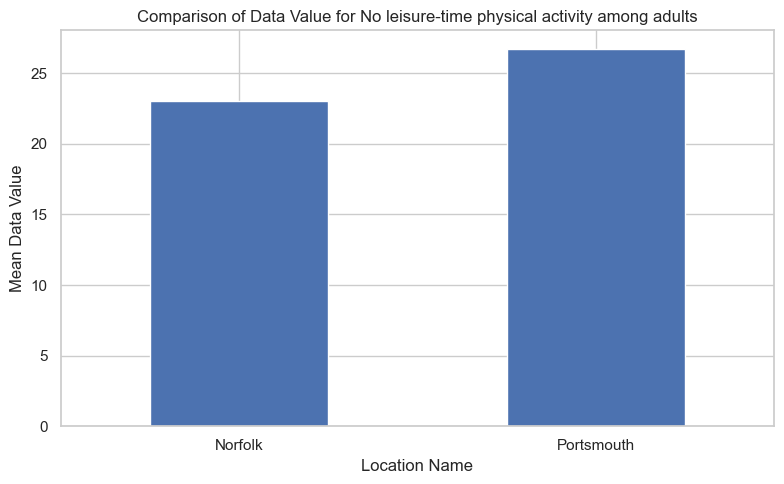

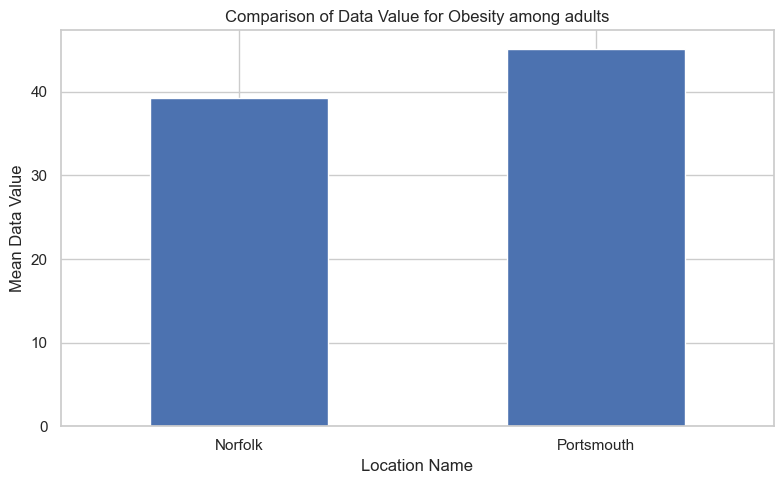

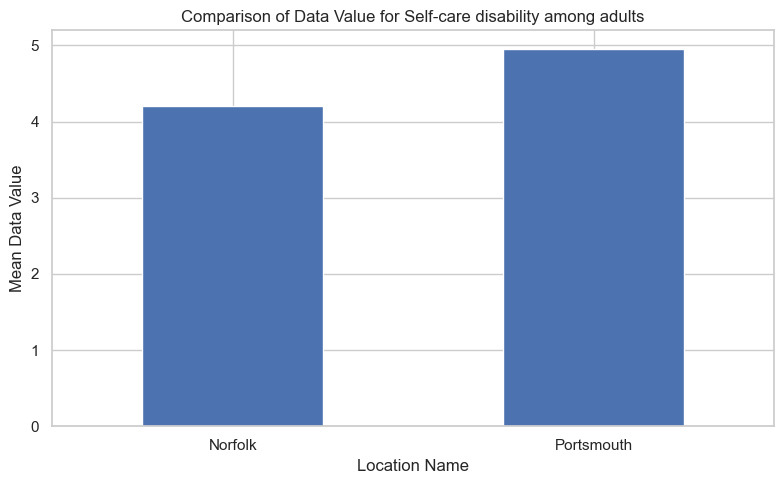

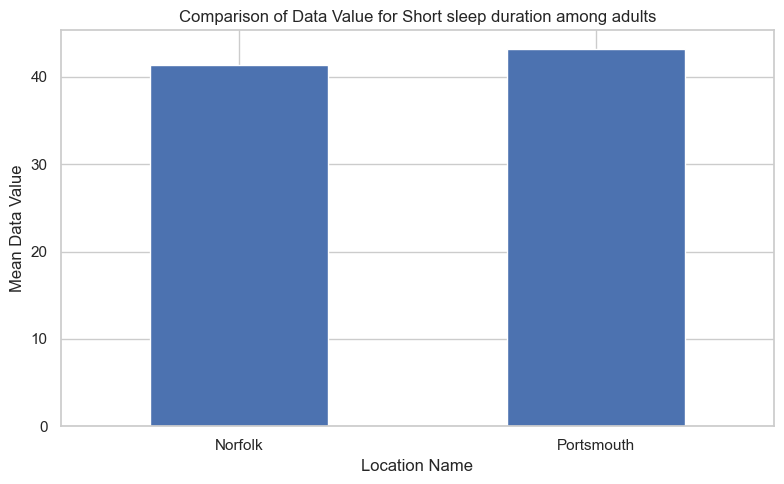

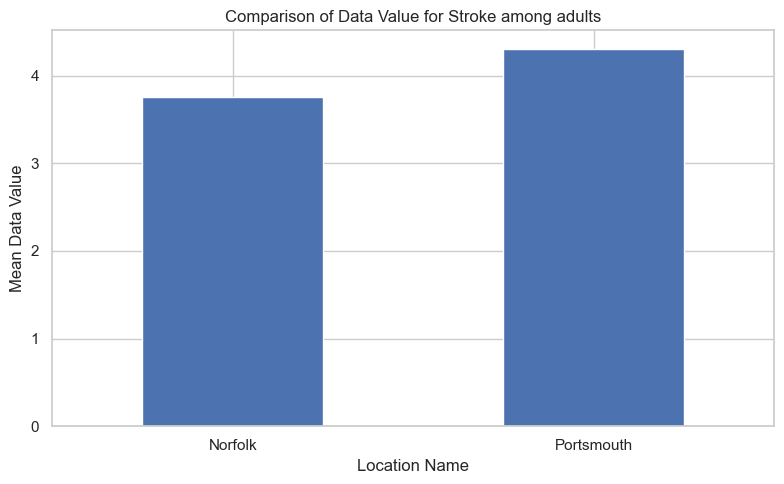

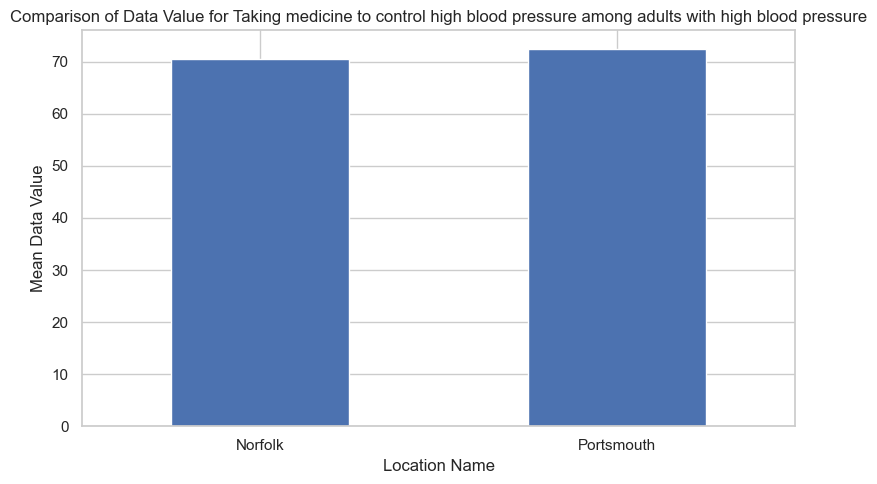

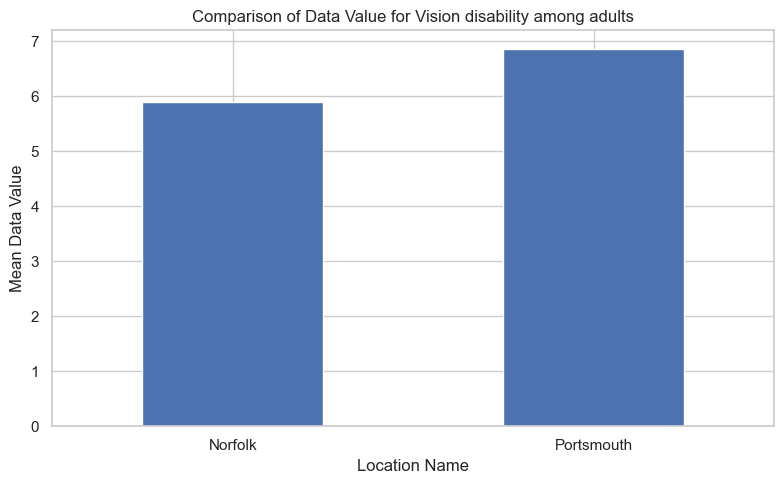

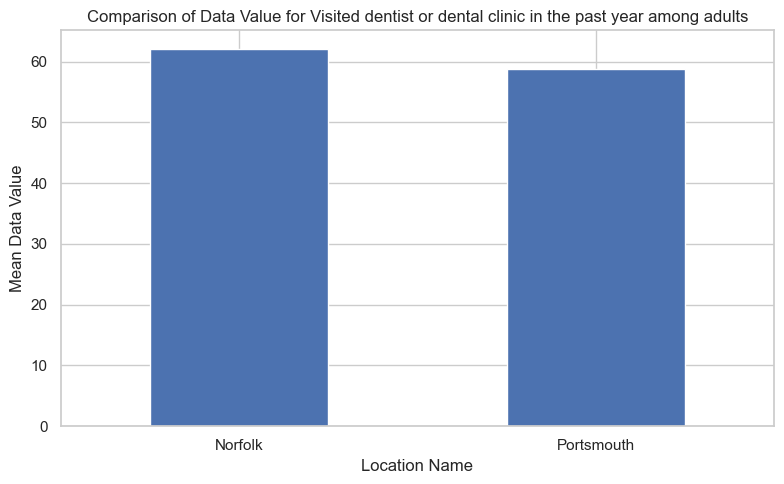

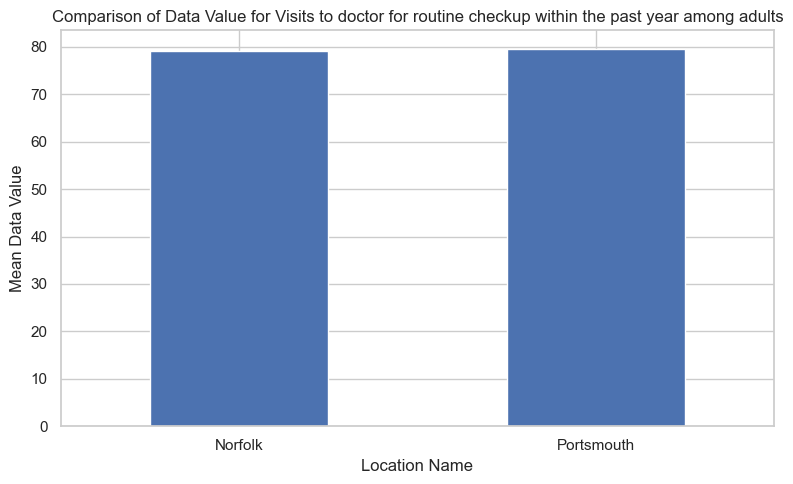

In [44]:
for measure in filtered_data.columns:
    # Plotting a bar graph for each measure
    ax = filtered_data[[measure]].plot(kind='bar', figsize=(8, 5), legend=False)
    
    # Add title and labels
    plt.title(f'Comparison of Data Value for {measure}')
    plt.ylabel('Mean Data Value')
    plt.xlabel('Location Name')
    
    # Ensure x-axis labels are horizontal
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.tight_layout()
    plt.show()